In [ ]:
!pip3 install sentence_transformers
#!pip3 install transformers

     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 2.1MB 16.4MB/s 
     |████████████████████████████████| 1.2MB 52.3MB/s 
     |████████████████████████████████| 901kB 54.8MB/s 
     |████████████████████████████████| 3.3MB 45.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.0-cp37-none-any.whl size=119615 sha256=a723adb96ed80c5e49b14d163205a834457122fcd9fc0fce246b679728ea47a9
  Stored in directory: /root/.cache/pip/wheels/84/cb/21/1066bff3027215c760ca14a198f698bca8fccb92e33e2327eb
Successfully built sentence-transformers


In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 12.8MB 227kB/s 
     |████████████████████████████████| 460kB 53.2MB/s 
     |████████████████████████████████| 1.1MB 46.1MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 9.1MB 50.6MB/s 
     |████████████████████████████████| 122kB 57.3MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=80a3829204690a02fe4b2b89d66f10c759294050cd04f38915471cb1729ba3cd
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

2021-05-01 06:34:12.797036: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8MB 22kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


< Restart the Runtime >

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly as py
import cufflinks
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from branca.element import Figure
import folium 
import matplotlib.pyplot as pPlot
import numpy as npy
from PIL import Image
from IPython.display import Image as img

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Dataset**

In [ ]:
# Read the data and delete uninterested columns
review_business_data_merged=pd.read_csv('/content/drive/MyDrive/yelp_reviews_business_merged.csv')
review_business_data_merged=review_business_data_merged.drop(columns=['Unnamed: 0','cool','funny','attributes','is_open','serves_food','useful','hours'])

In [ ]:
# Null Check
review_business_data_merged.isna().sum()

business_id        0
date               0
review_id          0
stars_x            0
text               0
user_id            0
address         2026
categories         0
city               0
latitude           0
longitude          0
name               0
postal_code       55
review_count       0
stars_y            0
state              0
dtype: int64

**Sample Reviews**

Few of the addresses and postal codes are none, but no reviews are null, so we can use all

In [ ]:
print(review_business_data_merged.iloc[123]['text'])
print(review_business_data_merged.iloc[1243]['text'])
print(review_business_data_merged.iloc[23]['text'])
print(review_business_data_merged.iloc[389]['text'])


What a relief to have a great meal in an airport. The Salmon hot pot was excellent. Can't wait to return!
It's not about the money! We went out thinking we would spend some good US dollars on the evening's dinner and a movie. The website said only Premium seats available, so we picked those. Once we got there we learned that there were plenty of Ultra Premium seats and the Premium seats did not get food or drink service. We waited in line for the food that was way below expectations. Note to self: never, ever stray from Alamo...much better food service and great atmosphere!
Enjoyed the food, just not so much the ordering style. Basically you order as if you are in a sushi joint. You check off what you'd like. But, there were quite a few options, more than I would like to see when I'm hungry. 

With that said, the food was good, the server was very nice and helpful (albeit very quite/low voice), and I would definitely go back!
TL:DNR - Delivery sucks, food was cold and flavorless.

Deli

**Mapping the sentiments of the Reviews**

In [ ]:
# starts 4-5: Positive(1), stars 1-2: Negative(3), stars 3: Neutral(2) 
def map_sentiment(rating):
    if(int(rating)==3):
        return 2
    elif(int(rating)<3):
        return 3
    else:
        return 1  
          
review_business_data_merged['stars_x']
review_sentiments=[map_sentiment(s) for s in review_business_data_merged['stars_x']]
review_business_data_merged['sentiments']=review_sentiments

**Sort The Businesses Based on Number of Reviews**

In [ ]:
review_business_data_merged['date']=pd.to_datetime(review_business_data_merged.date)
review_business_data_merged.value_counts(['business_id'])

business_id           
4CxF8c3MB7VAdY8zFb2cZQ    940
OQ2oHkcWA8KNC1Lsvj1SBA    766
PrsvO1rzkgg6qFizlAoEtg    752
zioLxtBc9THNS2TOn9xW1w    647
y2w6rFaO0XEiG5mFfOsiFA    550
                         ... 
x_LapuF4Zkn5lySuAsfePQ      1
GyLoT8b77CbRILV-E1E63A      1
prsJIdfNXTNcSgZbFwR72Q      1
cOTBEbXhuEmAqFgOyDs48w      1
Mcd7-su1Uu6Pi46OCziV_w      1
Length: 55134, dtype: int64

In [ ]:
# Get most review business ids
ids=review_business_data_merged.value_counts(['business_id'])
ids=[list(ids.index[i])[0] for i in range(len(ids))]


In [ ]:
data0=review_business_data_merged[review_business_data_merged['business_id']==ids[0]]
data1=review_business_data_merged[review_business_data_merged['business_id']==ids[1]]
data2=review_business_data_merged[review_business_data_merged['business_id']==ids[2]]
data3=review_business_data_merged[review_business_data_merged['business_id']==ids[3]]
data4=review_business_data_merged[review_business_data_merged['business_id']==ids[4]]
data=pd.concat([data0,data1,data2,data3,data4])
len(data)
data.to_csv('yelp_reviews_business_merged.csv')

In [ ]:
data_most_reviewed_store=review_business_data_merged[review_business_data_merged['business_id']=='y2w6rFaO0XEiG5mFfOsiFA'].sort_values(by=['date'])
data_most_reviewed_store.shape
business_name=data_most_reviewed_store.iloc[0]['name']
business_lat=data_most_reviewed_store.iloc[0]['latitude']
business_long=data_most_reviewed_store.iloc[0]['longitude']
business_rating=data_most_reviewed_store.iloc[0]['stars_y']
print('Name of the Store:',business_name)
print('Overall rating of the store:',business_rating)

Name of the Store: Neptune Oyster
Overall rating of the store: 4.5


Let's take the reviews of the most reviewed story and try to understand the customer's feeling towards the store

**Most Reviewed Store**

In [ ]:
data_most_reviewed_store=review_business_data_merged[review_business_data_merged['business_id']=='4CxF8c3MB7VAdY8zFb2cZQ'].sort_values(by=['date'])
data_most_reviewed_store.shape
business_name=data_most_reviewed_store.iloc[0]['name']
business_lat=data_most_reviewed_store.iloc[0]['latitude']
business_long=data_most_reviewed_store.iloc[0]['longitude']
business_rating=data_most_reviewed_store.iloc[0]['stars_y']
print('Name of the Store:',business_name)
print('Overall rating of the store:',business_rating)

Name of the Store: Voodoo Doughnut - Old Town
Overall rating of the store: 3.5


**Where is it located?**

In [ ]:
# Visualizing the location of the store

fig=Figure(width=550,height=350)
m1=folium.Map(width=550,height=350,location=[45.5226, -122.673],zoom_start=11,min_zoom=8,max_zoom=14)
folium.Marker(location=[45.5226, -122.673],popup=business_name,tooltip=business_name).add_to(m1)
fig.add_child(m1)
m1

**How people rated the store?**

In [ ]:
# Visualize the ratings

rating_5=len(data_most_reviewed_store[data_most_reviewed_store['stars_x']==5])
rating_4=len(data_most_reviewed_store[data_most_reviewed_store['stars_x']==4])
rating_3=len(data_most_reviewed_store[data_most_reviewed_store['stars_x']==3])
rating_2=len(data_most_reviewed_store[data_most_reviewed_store['stars_x']==2])
rating_1=len(data_most_reviewed_store[data_most_reviewed_store['stars_x']==1]) 
def getStarRatings():             
    fig = go.Figure()
    fig.add_trace(go.Bar(
            y=[1],
            x=[rating_1],
            name='1',
            orientation='h',marker=dict(
        color='rgb(255, 51, 51)'
    )))
    fig.add_trace(go.Bar(
            y=[2],
            name='2',
            x=[rating_2],
            orientation='h',marker=dict(
        color='rgb(255, 92, 51)'
    )))
    fig.add_trace(go.Bar(
            y=[3],
            name='3',
            x=[rating_3],
            orientation='h',marker=dict(
        color='rgb(255, 255, 77)'
    )))
    fig.add_trace(go.Bar(
            y=[4],
            name='4',
            x=[rating_4],
            orientation='h',marker=dict(
        color='rgb(77, 255, 166)'
    )))
    fig.add_trace(go.Bar(
            y=[5],
            name='5',
            x=[rating_5],
            orientation='h',marker=dict(
        color='rgb(166, 255, 77)'
        
     ))),
    fig.update_layout(
     autosize=False,
     width=500,
     height=500,
     title='Distribution of Review Ratings'
    )
    return fig
getStarRatings()    

**How the sentiment is distribured?**

In [ ]:

print('No of positive Review:',str(len(data_most_reviewed_store[data_most_reviewed_store['sentiments']==1])))
print('No of negative Review:',str(len(data_most_reviewed_store[data_most_reviewed_store['sentiments']==3])))
print('No of neutral Review:',str(len(data_most_reviewed_store[data_most_reviewed_store['sentiments']==2])))
sentimments_dict={3:'Negative',2:'Neutral',1:'Positive'}
sentiment_names=[sentimments_dict[int(i)] for i in data_most_reviewed_store['sentiments'].values]
data_most_reviewed_store['sentiment_name']=sentiment_names
fig = px.pie(data_most_reviewed_store, values='sentiments', names='sentiment_name',color='sentiment_name',color_discrete_map={'Neutral':'yellow','Negative':'cyan','Positive':'green'})
fig.update_layout(
     autosize=False,
     title='Distribution of Review Sentiments'
    )
fig.show()

No of positive Review: 539
No of negative Review: 180
No of neutral Review: 221


**What is the trend of sentients over time?**

In [ ]:
date_str=[en.strftime('%Y') for  en in data_most_reviewed_store['date']]
data_most_reviewed_store['date_year']=date_str
# Sum the number of reviews per year
data_most_reviewed_store_timeseries_pos=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1].groupby('date_year')['date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_neg=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3].groupby('date_year')['date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_neu=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2].groupby('date_year')['date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_pos['rating']=['Positive' for i in range(len(data_most_reviewed_store_timeseries_pos))]
data_most_reviewed_store_timeseries_neg['rating']=['Negative' for i in range(len(data_most_reviewed_store_timeseries_neg))]
data_most_reviewed_store_timeseries_neu['rating']=['Neutral' for i in range(len(data_most_reviewed_store_timeseries_neu))]
data_most_reviewed_store_timeseries=pd.concat([data_most_reviewed_store_timeseries_pos,data_most_reviewed_store_timeseries_neg])
data_most_reviewed_store_timeseries=pd.concat([data_most_reviewed_store_timeseries,data_most_reviewed_store_timeseries_neu])
# No of reviews per year
data_most_reviewed_store_timeseries['year']=data_most_reviewed_store_timeseries.index
data_most_reviewed_store_timeseries.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sentiments,rating,year
date_year,,,
2006,1,Positive,2006
2007,5,Positive,2007
2008,15,Positive,2008
2009,29,Positive,2009
2010,40,Positive,2010


In [ ]:
from plotly.subplots import make_subplots
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_pos['sentiments'],
                         mode='lines',
                         name='positive',
                         line=dict(color='rgb(0,245,153)', width=1)))
fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_neg['sentiments'],
                         mode='lines',
                         name='negative',
                         line=dict(color='rgb(255, 102, 102)', width=1)))
fig.add_trace(go.Scatter(x=list(data_most_reviewed_store_timeseries.index), 
                         y=data_most_reviewed_store_timeseries_neu['sentiments'],
                         mode='lines',
                         name='neutral',
                         line=dict(color='rgb(102, 102, 255)', width=1)))
fig.update_layout(
     autosize=False,
     title='Trend of sentiments over time'
    )

In [ ]:
fig = px.bar(data_most_reviewed_store_timeseries.tail(30), x='year', y='sentiments',color='rating')
fig.update_layout(
     autosize=False,
     title='Trend of sentiments over time - Bar Graph'
    )
fig.show()

**Let's see the words people are using in positive and negative reviews**

In [ ]:
corpus_pos=" ".join(list(data_most_reviewed_store[data_most_reviewed_store['sentiments']==1].text))
corpus_neg=" ".join(list(data_most_reviewed_store[data_most_reviewed_store['sentiments']==2].text))

In [ ]:
STOPWORDS.add("doughnut")
STOPWORDS.add("donuts")
STOPWORDS.add("voodoo")

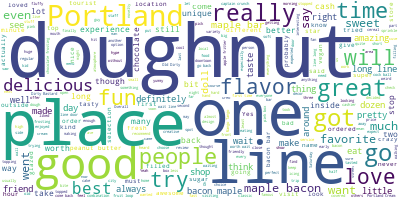

In [ ]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 15000, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("wordCloud.png")

# Postitive
create_word_cloud(corpus_pos.lower())
img('/content/wordCloud.png')

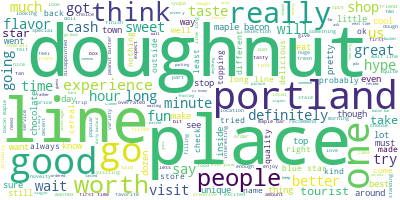

In [ ]:
create_word_cloud(corpus_neg.lower())
img('/content/wordCloud.png')

**Keyword Analysis**

In [ ]:
# Import Necessary Libraries
import re
import nltk
import numpy as np
import itertools
import pickle
import spacy
from tqdm.notebook import tqdm as tqdm
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm_notebook as tqdm
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Stopwards
stopwords = list(set(stopwords.words("english")))
stopwords+=['voodoo','doughnuts','doughnut']

In [ ]:
# Filtering the dataset based on Review Sentiments
positive_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1]
negative_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3]
neutral_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2]

In [ ]:
# Method to preprocess the data
def preprocess(data):
    # Preprocessing Texts
    preprocessed_texts = []
    lem = WordNetLemmatizer()
    # Cleaing the data, removing stopwords
    for sent in tqdm(data):
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z ]+', ' ', sent)
        # lemmatizing
        sent=' '.join(lem.lemmatize(word) for word in sent.split() if word not in stopwords )
        preprocessed_texts.append(sent.lower().strip())
    return preprocessed_texts

preprocessed_texts_neg=preprocess(negative_reviews.text.values)
preprocessed_texts_pos=preprocess(positive_reviews.text.values)
preprocessed_texts_neu=preprocess(neutral_reviews.text.values)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [ ]:
preprocessed_texts_pos[67]

'being ft worth thought pretty good bbq until got franklin bbq his top top best best imo amazing first let tell gun rally bbq added bonus when walk smell like think heaven would smell like texan made mouth water bad drooling when got didnt brisket turkey rib left we little disappointed really wanted try brisket ok so decided pulled pork sandwich sausage potato salad cole slaw the pulled pork right fatty cooked perfection the way almost taste time passion take make bbq magnitude alone almost make trip worth its good see people still enjoy oh sausage sausage sausage link thrown plate amazing spicy right when bite juice everywhere lol sorry inuendo and side but side travel austin travel best bbq atmosphere imagine me group decided make weekend trip austin tx sightseeing make franklin sell brisket we also got really lucky got since sold couple behind u get early'

In [ ]:
# https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea
def max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates):
    # Calculate distances and extract keywords
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # Get top_n words as candidates based on cosine similarity
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # Calculate the combination of words that are the least similar to each other
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [ ]:
    # Diversify the keywords using max sum similarity, higher the value of nr_candidates higher the diversity
    def extract_keywords_bert_diverse(doc,top_n=10,nr_candidates=20):
        n_gram_range = (1,1)
        # Extract candidate words/phrases using count vectorizer (TF-IDF Scores)
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stopwords).fit([doc])
        candidates = count.get_feature_names()
        # Embeddings of the document using Bert    
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        doc_embedding = model.encode([doc])
        candidate_embeddings = model.encode(candidates)
        keywords=max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates)
        return keywords 

In [ ]:
def get_trending_keywords(pos_data,neg_data,num_keywords):
    keywords={}
    corpus=' '.join(pos_data[-250::])
    keywords['positive']=extract_keywords_bert_diverse(corpus,num_keywords)
    corpus=' '.join(neg_data[-250::])
    keywords['negative']=extract_keywords_bert_diverse(corpus,num_keywords)
    return keywords

In [ ]:
 get_trending_keywords(preprocessed_texts_pos,preprocessed_texts_neg,5)

{'negative': ['diabetes', 'vegan', 'hotpants', 'blueberry', 'halloween'],
 'positive': ['foodgasm', 'vegan', 'sugary', 'simpsons', 'blueberry']}

In [ ]:
# Import Necessary Libraries
import re
import nltk
import numpy as np
import itertools
import spacy
from tqdm.notebook import tqdm as tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords

class CustomerReviewKeywords1:
    # Method to preprocess the data
    stopwords_ = list(set(stopwords.words("english")))
    stopwords_+=['voodoo','doughnuts','doughnut','voodoodoughnut']
    def preprocess(self,data,stopwords):
        # Preprocessing Texts
        preprocessed_texts = []
        lem = WordNetLemmatizer()
        # Cleaing the data, removing stopwords
        for sent in data:
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z ]+', ' ', sent)
            # lemmatizing
            sent=' '.join(word for word in sent.split() if word not in stopwords)
            preprocessed_texts.append(sent.lower().strip())
        return preprocessed_texts
    
    # https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea
    def max_sum_sim(self,doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates):
        # Calculate distances and extract keywords
        distances = cosine_similarity(doc_embedding, candidate_embeddings)
        distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

        # Get top_n words as candidates based on cosine similarity
        words_idx = list(distances.argsort()[0][-nr_candidates:])
        words_vals = [candidates[index] for index in words_idx]
        distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

        # Calculate the combination of words that are the least similar to each other
        min_sim = np.inf
        candidate = None
        for combination in itertools.combinations(range(len(words_idx)), top_n):
            sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
            if sim < min_sim:
                candidate = combination
                min_sim = sim
        return [words_vals[idx] for idx in candidate]

    # Diversify the keywords using max sum similarity, higher the value of nr_candidates higher the diversity
    def extract_keywords_bert_diverse(self,doc,stopwords,top_n=10,nr_candidates=20):
        n_gram_range = (1,1)
        # Extract candidate words/phrases using count vectorizer (TF-IDF Scores)
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stopwords).fit([doc])
        candidates = count.get_feature_names()
        # Embeddings of the document using Bert    
        model = SentenceTransformer('distilbert-base-nli-mean-tokens')
        doc_embedding = model.encode([doc])
        candidate_embeddings = model.encode(candidates)
        keywords=self.max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates)
        return keywords 

    # Method to get the trending keywords
    def get_trending_keywords(self,data_most_reviewed_store,num_keywords=5):
        # Stopwards
        stopwords_ = list(set(stopwords.words("english")))
        stopwords_+=['voodoo','doughnuts','doughnut','voodoodoughnut','donut','donuts']
        # Filtering the dataset based on Review Sentiments
        positive_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==1]
        negative_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3]
        neutral_reviews=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2]
        preprocessed_texts_neg=self.preprocess(negative_reviews.text.values,stopwords_)
        preprocessed_texts_pos=self.preprocess(positive_reviews.text.values,stopwords_)
        preprocessed_texts_neu=self.preprocess(neutral_reviews.text.values,stopwords_)  
        keywords={}
        corpus=' '.join(preprocessed_texts_pos[-500::])
        keywords['positive']=self.extract_keywords_bert_diverse(corpus,stopwords_,num_keywords)
        corpus=' '.join(preprocessed_texts_neg[-500::])
        keywords['negative']=self.extract_keywords_bert_diverse(corpus,stopwords_,num_keywords)
        return keywords   




In [ ]:
ck=CustomerReviewKeywords1()
data_most_reviewed_store=review_business_data_merged[review_business_data_merged['business_id']==ids[5]].sort_values(by=['date'])
kw=ck.get_trending_keywords(data_most_reviewed_store,num_keywords=5)

In [ ]:
df=pd.DataFrame(columns=['id','pos_keywords','neg_keywords'])
review_ids=[]
pos_keywords=[]
neg_keywords=[]

for i in range(10):
    ck=CustomerReviewKeywords1()
    data_most_reviewed_store=review_business_data_merged[review_business_data_merged['business_id']==ids[int(i)]].sort_values(by=['date'])
    kw=ck.get_trending_keywords(data_most_reviewed_store,num_keywords=5)
    review_ids.append(ids[int(i)])
    pos_keywords.append(kw['positive'])
    neg_keywords.append(kw['negative'])
df['id']=review_ids
df['pos_keywords']=pos_keywords
df['neg_keywords']=neg_keywords
df.head()

,id,pos_keywords,neg_keywords
0,4CxF8c3MB7VAdY8zFb2cZQ,"[elvis, batman, thunderbolt, cupcakeries, butt...","[diabetes, hotpants, vegan, blueberry, halloween]"
1,OQ2oHkcWA8KNC1Lsvj1SBA,"[steaks, apricot, blueberries, sandwiches, gin...","[waiter, bacon, vegan, waitress, buttermilk]"
2,PrsvO1rzkgg6qFizlAoEtg,"[marscapone, lobstertail, pizzeria, buttery, s...","[cancer, desert, italians, vegan, cupcakes]"
3,zioLxtBc9THNS2TOn9xW1w,"[trout, tequila, lemonade, waitresses, steakho...","[appetizers, catfish, vegans, pepsi, steak]"
4,y2w6rFaO0XEiG5mFfOsiFA,"[shellfish, corncake, avocado, cheeseburger, t...","[shrimps, johnnycake, bartender, dinner, chees..."


In [ ]:
data_most_reviewed_store.columns

Index(['business_id', 'date', 'review_id', 'stars_x', 'text', 'user_id',
       'address', 'categories', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'stars_y', 'state', 'sentiments'],
      dtype='object')

In [ ]:
def recent_reviews(review_business_data_merged,id):
    data_most_reviewed_store=review_business_data_merged[review_business_data_merged['business_id']==id].sort_values(by=['date'],ascending=False)
    sentimments_dict={3:'Negative',2:'Neutral',1:'Positive'}
    sentiment_names=[sentimments_dict[int(i)] for i in data_most_reviewed_store['sentiments'].values]
    data_most_reviewed_store['sentiment']=sentiment_names
    data_most_reviewed_store=data_most_reviewed_store.drop(columns=['business_id','review_id','user_id','user_id','categories'])
    data_most_reviewed_store=data_most_reviewed_store[['text','sentiment','date','stars_x']]
    data_most_reviewed_store=data_most_reviewed_store.rename(columns={'stars_x':'rating','text':'review'})
    return data_most_reviewed_store

recent_reviews(review_business_data_merged,ids[1])    

,review,sentiment,date,rating
178423,Fried chicken sandwich was exactly what I want...,Positive,2021-01-19 00:22:42,4.0
179693,I had a great breakfast here and left happy. T...,Positive,2021-01-05 23:05:32,5.0
175361,I've had so many different chicken-and-waffle ...,Positive,2020-12-04 00:53:42,5.0
177779,As someone from the south it's good to have a ...,Positive,2020-11-14 17:48:29,5.0
180412,"Went here on vacation, food was good. ordered...",Neutral,2020-11-02 17:21:08,3.0
...,...,...,...,...
143771,I was astounded to find a place up here that h...,Positive,2008-03-02 16:26:37,4.0
143184,I went here for dinner with my parents. The fo...,Negative,2008-02-12 20:02:50,2.0
157263,If you asked me my favorite restaurant in Port...,Positive,2007-11-20 20:49:43,5.0
159429,Ok. I think the fact that I have eaten at the ...,Positive,2007-10-07 01:49:23,5.0


In [ ]:
import ast
keywords=pd.read_csv('/content/trending_keywords.csv')
def get_Keywords(keywords,id):
    keywords=keywords[keywords['id']==id].iloc[0]
    pos = ast.literal_eval(keywords['pos_keywords'])
    neg = ast.literal_eval(keywords['neg_keywords'])
    return pos,neg

pos,neg=get_Keywords(keywords,ids[0])    
type(pos)

list

In [ ]:
pos[0]

'elvis'